In [22]:
import mysql.connector
import pandas as pd

# 建立 MySQL 連線
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='127.0.0.1',
            database='kol_1017',
            user='root',
            password='123456789',
            port=3306
        )
        if connection.is_connected():
            return connection
    except mysql.connector.Error as e:
        print(f"Error while connecting to MySQL: {e}")
    return None

# 連線資料庫並讀取數據
connection = create_connection()




C:\Users\SHI\AppData\Local\Temp\ipykernel_14340\2369869308.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


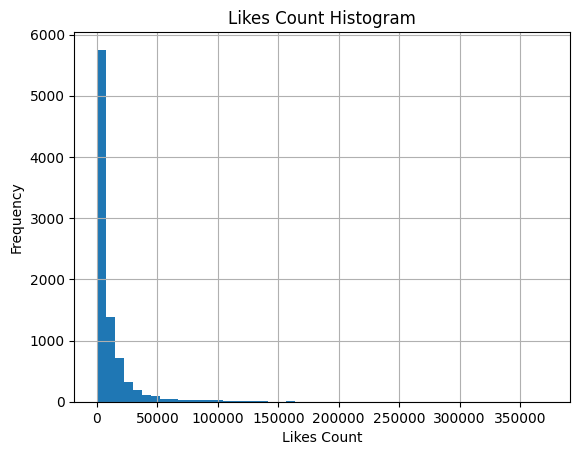

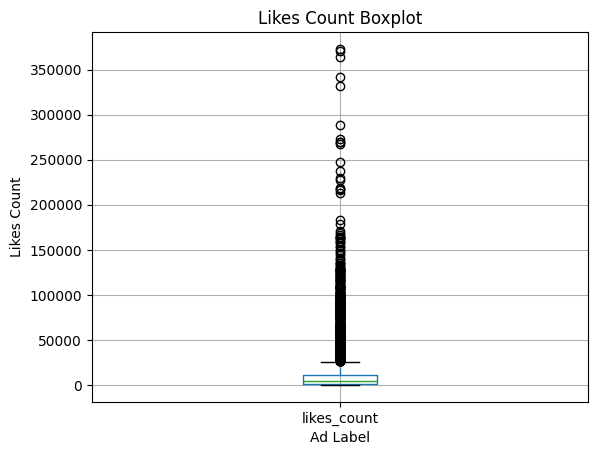

In [23]:
import matplotlib.pyplot as plt
if connection:
    query = "SELECT * FROM kol_post_detail WHERE ad_label <> 0"
    df = pd.read_sql(query, connection)
    connection.close()

    # 按讚數的直方圖
    df['likes_count'].hist(bins=50)
    plt.title('Likes Count Histogram')
    plt.xlabel('Likes Count')
    plt.ylabel('Frequency')
    plt.show()

    # 箱型圖

    df.boxplot(column='likes_count')
    plt.title('Likes Count Boxplot')
    plt.xlabel('Ad Label')
    plt.ylabel('Likes Count')
    plt.show()

C:\Users\SHI\AppData\Local\Temp\ipykernel_14340\2515108931.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


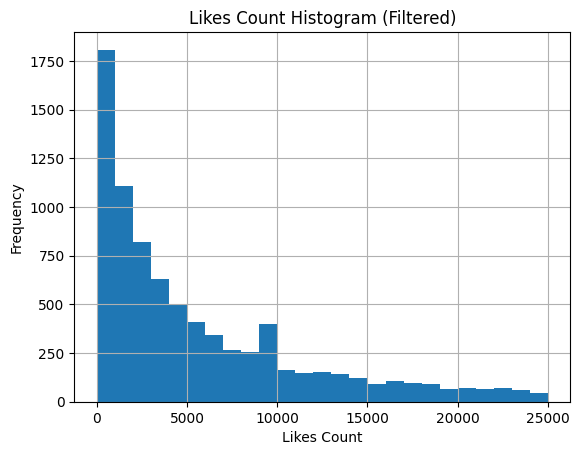

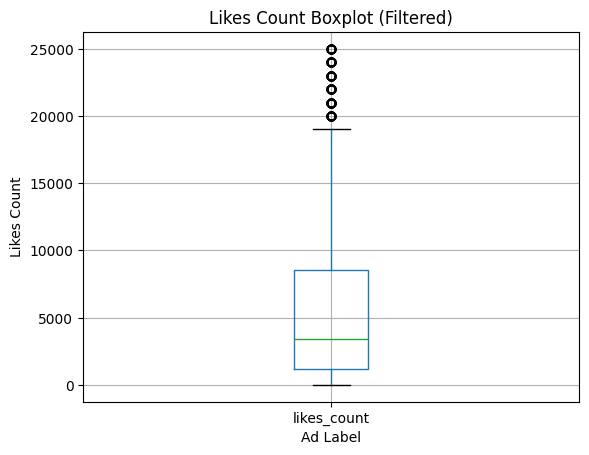

In [28]:
import mysql.connector
import pandas as pd

# 建立 MySQL 連線
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='127.0.0.1',
            database='kol_1017',
            user='root',
            password='123456789',
            port=3306
        )
        if connection.is_connected():
            return connection
    except mysql.connector.Error as e:
        print(f"Error while connecting to MySQL: {e}")
    return None

# 連線資料庫並讀取數據
connection = create_connection()

if connection:
    query = "SELECT * FROM kol_post_detail WHERE ad_label <> 0"
    df = pd.read_sql(query, connection)
    connection.close()

    # 去除極端值 (IQR 方法)
    Q1 = df["likes_count"].quantile(0.25)
    Q3 = df["likes_count"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df["likes_count"] >= lower_bound) & (df["likes_count"] <= upper_bound)]

    #直方圖
    df_filtered['likes_count'].hist(bins=25)
    plt.title('Likes Count Histogram (Filtered)')
    plt.xlabel('Likes Count')
    plt.ylabel('Frequency')
    plt.show()

    # 箱型圖
    df_filtered.boxplot(column='likes_count')
    plt.title('Likes Count Boxplot (Filtered)')
    plt.xlabel('Ad Label')
    plt.ylabel('Likes Count')
    plt.show()

    # # 計算 likes_count 的 30% 和 70% 分位數
    # threshold_high = df_filtered["likes_count"].quantile(0.7)
    # threshold_low = df_filtered["likes_count"].quantile(0.3)

    # # 前 30% (高讚數) 按讚數降序排序
    # df_high = df_filtered[df_filtered["likes_count"] >= threshold_high].sort_values(by="likes_count", ascending=False)

    # # 後 30% (低讚數) 按讚數升序排序
    # df_low = df_filtered[df_filtered["likes_count"] <= threshold_low].sort_values(by="likes_count", ascending=True)

    # # 輸出結果到 CSV
    # df_high.to_csv("high_likes_kol_post_detail.csv", index=False)
    # df_low.to_csv("low_likes_kol_post_detail.csv", index=False)

    # print("已將高讚數結果輸出至 high_likes_kol_post_detail.csv (降序排序)")
    # print("已將低讚數結果輸出至 low_likes_kol_post_detail.csv (升序排序)")



C:\Users\SHI\AppData\Local\Temp\ipykernel_14340\2004924917.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


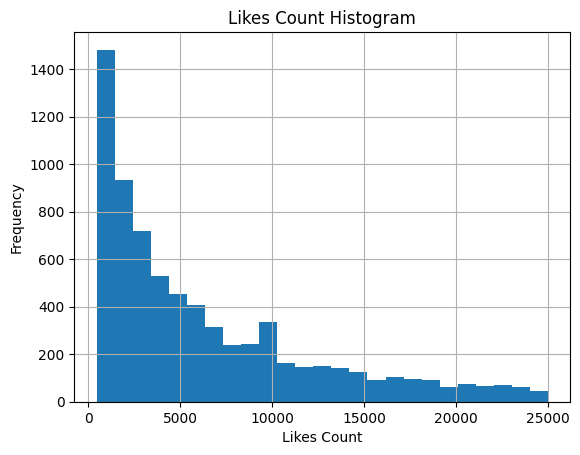

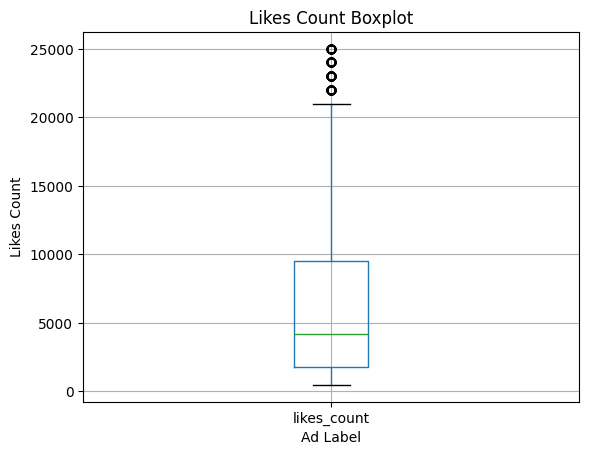

In [26]:
import mysql.connector
import pandas as pd

# 建立 MySQL 連線
def create_connection():
    try:
        connection = mysql.connector.connect(
            host='127.0.0.1',
            database='kol_1017',
            user='root',
            password='123456789',
            port=3306
        )
        if connection.is_connected():
            return connection
    except mysql.connector.Error as e:
        print(f"Error while connecting to MySQL: {e}")
    return None

# 連線資料庫並讀取數據
connection = create_connection()

if connection:
    query = "SELECT * FROM kol_post_detail WHERE ad_label <> 0"
    df = pd.read_sql(query, connection)
    connection.close()

    # 計算 likes_count 的 10% 和 90% 分位數 (去掉頭尾 10%)
    threshold_high = df["likes_count"].quantile(0.9)  # 上 10% 門檻
    threshold_low = df["likes_count"].quantile(0.1)   # 下 10% 門檻

    df_filtered = df[(df["likes_count"] >= threshold_low) & (df["likes_count"] <= threshold_high)]

    # 計算 likes_count 的 30% 和 70% 分位數
    threshold_high_30 = df_filtered["likes_count"].quantile(0.7)
    threshold_low_30 = df_filtered["likes_count"].quantile(0.3)


    # 直方圖
    df_filtered['likes_count'].hist(bins=25)
    plt.title('Likes Count Histogram')
    plt.xlabel('Likes Count')
    plt.ylabel('Frequency')
    plt.show()

    # 箱型圖
    df_filtered.boxplot(column='likes_count')
    plt.title('Likes Count Boxplot')
    plt.xlabel('Ad Label')
    plt.ylabel('Likes Count')
    plt.show()
    # # 前 30% (高讚數) 按讚數降序排序
    # df_high = df_filtered[df_filtered["likes_count"] >= threshold_high_30].sort_values(by="likes_count", ascending=False)

    # # 後 30% (低讚數) 按讚數升序排序
    # df_low = df_filtered[df_filtered["likes_count"] <= threshold_low_30].sort_values(by="likes_count", ascending=True)

    # # 輸出結果到 CSV
    # df_high.to_csv("high_10_likes_kol_post_detail.csv", index=False)
    # df_low.to_csv("low_10_likes_kol_post_detail.csv", index=False)

    # print("已將高讚數結果輸出至 high_likes_kol_post_detail.csv (降序排序)")
    # print("已將低讚數結果輸出至 low_likes_kol_post_detail.csv (升序排序)")
